C:\Users\bhara\AppData\Local\Temp\ipykernel_23136\2966992424.py:34: RuntimeWarning: invalid value encountered in divide
  normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.92857143 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.07142857
  0.        ]
 [0.         0.07142857 0.92857143 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.07142857 0.         0.78571429 0.         0.07142857
  0.         0.         0.         0.07142857 0.         0.
  0.        ]
 [0.         0.         0.         0.14285714 0.85714286 0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.07142857 0.         0.         0.92857143
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.28571429 0.         0.         0.         0.         0.
  0.71428571 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0. 

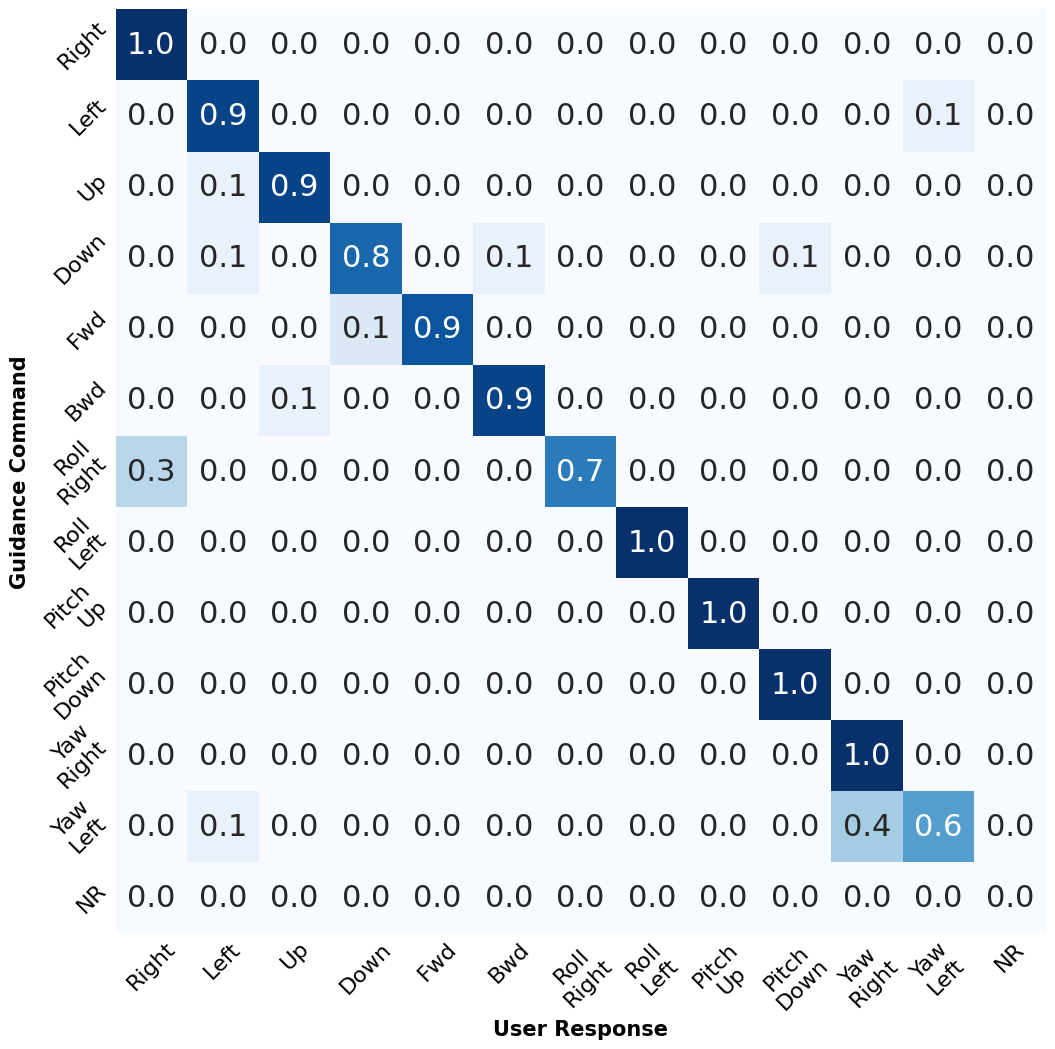

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker
import seaborn as sns



# read file and strip any whitespace (adjust rows for free space which is shifted down)
df = pd.read_csv("freespace_correlation.csv")
# free space corr
# df = df.iloc[1:]
df.iloc[:, 0] = df.iloc[:, 0].str.strip()
df.iloc[:, 2] = df.iloc[:, 2].str.strip()
# df.iloc[:, 3] = df.iloc[:, 3]
# lambda corr
# df.iloc[:, 0] = df.iloc[:, 0].str.strip()
# df.iloc[:, 2] = df.iloc[:, 2].str.strip()

actual_labels = df[df.columns[0]].to_numpy()
movements = df[df.columns[2]].to_numpy()

# actual and predicted labels
# actual_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
# predicted_labels = np.array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0])
class_order = ["Right", "Left", "Up", "Down", "Forward", "Backward", "Roll Right", "Roll Left", "Pitch Up", "Pitch Down", "Yaw Right", "Yaw Left", "NR"]
class_labels = ["Right", "Left", "Up", "Down", "Fwd", "Bwd", "Roll\nRight", "Roll\nLeft", "Pitch\nUp", "Pitch\nDown", "Yaw\nRight", "Yaw\nLeft", "NR"]
# Create the confusion matrix
conf_matrix = confusion_matrix(actual_labels, movements, labels=class_order)

# Calculate the normalized confusion matrix
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
normalized_conf_matrix = np.nan_to_num(normalized_conf_matrix, nan=0)

# Print the normalized confusion matrix
print(normalized_conf_matrix)
# print(normalized_conf_matrix)

#set font properties
font = FontProperties(size=15)
font.set_weight('bold')

title_font = FontProperties(size=25)
title_font.set_weight('bold')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(normalized_conf_matrix, annot=True, fmt=".1f", cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size': 22})
plt.xticks(rotation=45, fontsize=16)
plt.yticks(rotation=45, fontsize=16)
# Remove the ticks for both x and y axes
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel('User Response', fontproperties=font)
plt.ylabel('Guidance Command', fontproperties=font)
# plt.title('Free Space Correlation Confusion Matrix\n', fontproperties=title_font)

# make colorbar
# cbar = plt.colorbar()
# cbar.set_label('Count', rotation=270, labelpad=15)  # Add a label for the colorbar
plt.savefig("freespace_corr_matrix.png", dpi=300)
plt.show()
